# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
temp_units = "imperial"
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")


Processing Record 1 of Set 1 | ponta do sol
City not found. Skipping...
Processing Record 2 of Set 1 | namibe
Processing Record 3 of Set 1 | biak
Processing Record 4 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | charters towers
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | sabancuy
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | yumen
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | port blair
Processing Record 20 of Set 1 | carnarvon
City not found. Skipping...
Processing Record 21 of Set 1 | fukuma
Processing Record 22 of Set 1 | bondo
Processing Record 23 of Set 

Processing Record 38 of Set 4 | ishioka
Processing Record 39 of Set 4 | palimbang
Processing Record 40 of Set 4 | tautira
Processing Record 41 of Set 4 | poronaysk
Processing Record 42 of Set 4 | katangli
City not found. Skipping...
Processing Record 43 of Set 4 | axim
Processing Record 44 of Set 4 | quelimane
Processing Record 45 of Set 4 | grand river south east
Processing Record 46 of Set 4 | tuatapere
Processing Record 47 of Set 4 | santa cruz
Processing Record 48 of Set 4 | bialogard
Processing Record 49 of Set 4 | bukachacha
Processing Record 1 of Set 5 | viedma
Processing Record 2 of Set 5 | chattanooga
Processing Record 3 of Set 5 | caravelas
Processing Record 4 of Set 5 | tiarei
City not found. Skipping...
Processing Record 5 of Set 5 | tsabong
Processing Record 6 of Set 5 | bontang
Processing Record 7 of Set 5 | hutchinson
Processing Record 8 of Set 5 | nuuk
Processing Record 9 of Set 5 | salinopolis
Processing Record 10 of Set 5 | khovu-aksy
Processing Record 11 of Set 5 | n

Processing Record 28 of Set 8 | pimenta bueno
Processing Record 29 of Set 8 | nome
Processing Record 30 of Set 8 | llaillay
Processing Record 31 of Set 8 | gamba
Processing Record 32 of Set 8 | imbituba
Processing Record 33 of Set 8 | moose factory
City not found. Skipping...
Processing Record 34 of Set 8 | hay river
Processing Record 35 of Set 8 | lorengau
Processing Record 36 of Set 8 | dongli
Processing Record 37 of Set 8 | aqtobe
City not found. Skipping...
Processing Record 38 of Set 8 | okhotsk
Processing Record 39 of Set 8 | beringovskiy
Processing Record 40 of Set 8 | bojnurd
Processing Record 41 of Set 8 | oranjemund
Processing Record 42 of Set 8 | vostok
Processing Record 43 of Set 8 | vao
Processing Record 44 of Set 8 | fort saint james
Processing Record 45 of Set 8 | port-cartier
Processing Record 46 of Set 8 | brewster
Processing Record 47 of Set 8 | mujiayingzi
Processing Record 48 of Set 8 | vardo
City not found. Skipping...
Processing Record 49 of Set 8 | labuhan
Proces

Processing Record 13 of Set 12 | talara
Processing Record 14 of Set 12 | atemar
Processing Record 15 of Set 12 | harnosand
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [36]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [37]:
# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)

In [38]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ponta do sol,78,PT,1632798348,83,38.7333,-28.2667,64.42,14.03
1,namibe,30,AO,1632798348,89,-15.1961,12.1522,62.13,3.87
2,biak,95,ID,1632798349,68,-0.9131,122.8766,83.07,4.07
3,ushuaia,93,AR,1632798349,94,-54.8000,-68.3000,36.90,3.15
4,rikitea,37,PF,1632798350,75,-23.1203,-134.9692,73.15,21.14


In [39]:
weather_dataframe.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lng           554
Max Temp      554
Wind Speed    554
dtype: int64

In [40]:
# output data to csv
weather_dataframe.to_csv(output_data_file)

In [41]:
weather_dataframe

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ponta do sol,78,PT,1632798348,83,38.7333,-28.2667,64.42,14.03
1,namibe,30,AO,1632798348,89,-15.1961,12.1522,62.13,3.87
2,biak,95,ID,1632798349,68,-0.9131,122.8766,83.07,4.07
3,ushuaia,93,AR,1632798349,94,-54.8000,-68.3000,36.90,3.15
4,rikitea,37,PF,1632798350,75,-23.1203,-134.9692,73.15,21.14
...,...,...,...,...,...,...,...,...,...
549,ekibastuz,100,KZ,1632798507,81,51.6667,75.3667,38.43,13.67
550,tilichiki,100,RU,1632798507,55,60.4667,166.1000,42.78,8.66
551,talara,10,PE,1632798508,87,-4.5772,-81.2719,64.81,12.62
552,atemar,100,RU,1632798508,87,54.1810,45.4091,38.05,13.49


In [42]:
city_left_count = len(weather_dataframe)
city_left_count

554

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [43]:
weather_dataframe['Humidity'].max()

100

In [44]:
describe_df = weather_dataframe.describe()
describe_df

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,554.000000,5.540000e+02,554.000000,554.000000,554.000000,554.000000,554.000000
mean,53.496390,1.632798e+09,71.781588,22.998149,20.826937,64.040108,7.151661
std,39.198306,7.482005e+01,20.015662,31.447847,86.827469,16.501675,4.851965
min,0.000000,1.632798e+09,9.000000,-54.800000,-175.200000,21.000000,0.000000
25%,10.000000,1.632798e+09,61.250000,-2.742250,-52.895350,52.270000,3.440000
50%,59.000000,1.632798e+09,74.500000,29.070600,23.015350,67.990000,6.205000
75%,94.000000,1.632798e+09,88.000000,49.212525,98.188050,77.047500,9.855000
max,100.000000,1.632799e+09,100.000000,78.218600,179.316700,95.320000,27.470000


In [45]:
#  Get the indices of cities that have humidity over 100%.
print('NO CITIES OVER 100% HUMIDITY')

NO CITIES OVER 100% HUMIDITY


In [46]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

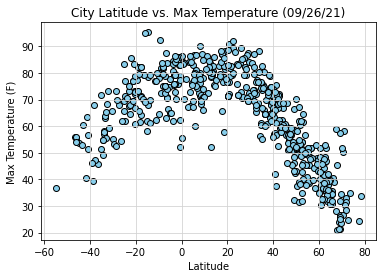

In [47]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (09/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/fig1.png")
plt.show()

In [2]:
print('The code is analyzing the temperature recorded in the queried cities against where they are geographically. This is done to get a sense of the relationship that your geographical latitude plays in the temperature of your city')

The code is analyzing the temperature recorded in the queried cities against where they are geographically. This is done to get a sense of the relationship that your geographical latitude plays in the temperature of your city


## Latitude vs. Humidity Plot

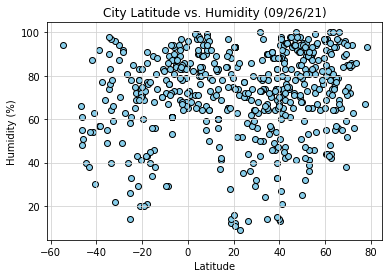

In [48]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (09/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/fig2.png")
plt.show()

In [49]:
print('The code is analyzing the humidity level recorded in the queried cities against where they are geographically by latitude. This is done to get a sense of the relationship that your geographical latitude plays in the humidity of your city')

The code is analyzing the humidity level recorded in the queried cities against where they are geographically by latitude. This is done to get a sense of the relationship that your geographical latitude plays in the humidity of your city


## Latitude vs. Cloudiness Plot

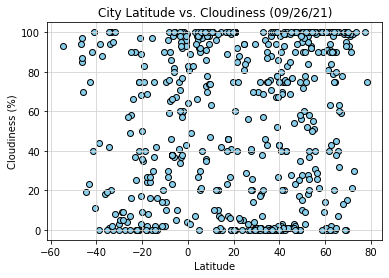

In [50]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (09/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/fig3.png")
plt.show()

In [51]:
print('The code is analyzing the cloudiness recorded in the queried cities against where they are geographically. This is done to get a sense of the relationship that your geographical latitude plays in the cloudiness of your city')

The code is analyzing the cloudiness recorded in the queried cities against where they are geographically. This is done to get a sense of the relationship that your geographical latitude plays in the cloudiness of your city


## Latitude vs. Wind Speed Plot

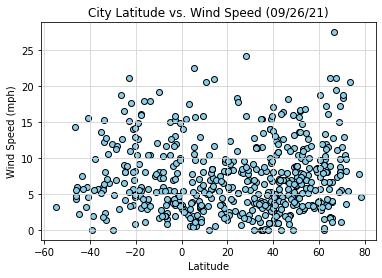

In [52]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (09/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/fig4.png")
plt.show()

In [53]:
print('The code is analyzing the wind speed recorded in the queried cities against where they are geographically. This is done to get a sense of the relationship that your geographical latitude plays in the wind speed of your city')

The code is analyzing the wind speed recorded in the queried cities against where they are geographically. This is done to get a sense of the relationship that your geographical latitude plays in the wind speed of your city


## Linear Regression

In [54]:
def makeLinRegression(df, x_Col, y_Col):
    #first, perform the linear regression on the data
    (regr_slope, regr_intercept, regr_r_val, _, _) = linregress(df[x_Col], 
                                                           df[y_Col])
    #setup the linear regression line x and y axes data points
    regr_line_x = np.array([a for a in range(int(min(df[x_Col].values)), int(max(df[x_Col].values)+1))])
    regr_line_y = regr_slope * regr_line_x + regr_intercept

    #plot the scatterplot with the raw data first!
    df_axes = df.plot(kind="scatter", x=x_Col, y=y_Col, 
                      title="{} vs. {} ({})"
                        .format(y_Col, x_Col, weather_dataframe["City"].iloc[0].split(",")[0]))

    #add the best fit lines to the plot as a solid red line
    df_axes.plot(regr_line_x, regr_line_y, 'r')

    #output best-fit line information
    print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
          .format(regr_slope, regr_intercept))
    print("The r-squared correlation coefficient for this line is {:.2f}".format(regr_r_val))
                  
    #return the axes object for the plots, in case any changes need to be made
    return df_axes

In [55]:
northern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"] >= 0]
northern_cities_count = len(northern_hemisphere)
print("There are {} cities in the northern hemisphere out of {} cities total, representing {:.1%} of all cities in the data set."
     .format(northern_cities_count, city_left_count, (northern_cities_count/city_left_count)))


There are 401 cities in the northern hemisphere out of 554 cities total, representing 72.4% of all cities in the data set.


In [56]:
southern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"] < 0]
southern_cities_count = len(southern_hemisphere)
print("There are {} cities in the southern hemisphere out of {} cities total, representing {:.1%} of all cities in the data set."
     .format(southern_cities_count, city_left_count, (southern_cities_count/city_left_count)))

There are 153 cities in the southern hemisphere out of 554 cities total, representing 27.6% of all cities in the data set.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=-0.75x+90.76
The r-squared correlation coefficient for this line is -0.84


Text(0.5, 15.0, 'Latitude')

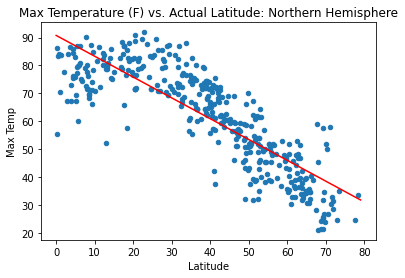

In [75]:
(n_temp_slope, n_temp_intercept, n_temp_r_val, _, _) = linregress(northern_hemisphere["Lat"], 
                                                           northern_hemisphere["Max Temp"])

regr_line_x = np.array([a for a in range(80)])
regr_line_y = n_temp_slope * regr_line_x + n_temp_intercept

n_temp_axes = northern_hemisphere.plot(kind="scatter", x="Lat", 
                                       y="Max Temp", 
                                       title="Max Temperature (F) vs. Actual Latitude: Northern Hemisphere".
                                       format(weather_dataframe['City'].iloc[0].split(",")[0]))
                        

n_temp_axes.plot(regr_line_x, regr_line_y, 'r')

print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(n_temp_slope, n_temp_intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(n_temp_r_val))
n_temp_axes.get_figure().savefig("../output_data/Temp_vs_Latitude_N_Hemisphere.png")
plt.xlabel('Latitude')

In [14]:
print('This code creates a scatter plot of the Max Temp of cities in the northern hemisphere in relation to their geographical latitude. The plot is used to attempt to visualize if there is a correlation. There seems to be a strong negative correlation here. This would mean that generally as the latitude of your city increases the maximum temperature decreases. ')

This code creates a scatter plot of the Max Temp of cities in the northern hemisphere in relation to their geographical latitude. The plot is used to attempt to visualize if there is a correlation. There seems to be a strong negative correlation here. This would mean that generally as the latitude of your city increases the maximum temperature decreases. 


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=0.60x+81.10
The r-squared correlation coefficient for this line is 0.69


Text(0.5, 15.0, 'Latitude')

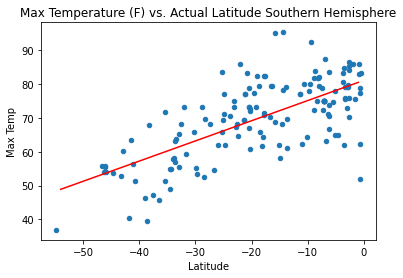

In [76]:
s_temp_lat_axes = makeLinRegression(southern_hemisphere, "Lat", "Max Temp")
s_temp_lat_axes.get_figure().savefig("../output_data/Temp_vs_Latitude_S_Hemisphere.png")
plt.title("Max Temperature (F) vs. Actual Latitude Southern Hemisphere")
plt.xlabel('Latitude')

In [15]:
print('This code creates a scatter plot of the Max Temp of cities in the southern hemisphere in relation to their geographical latitude. The plot is used to attempt to visualize if there is a correlation. This chart shows strong positive correlation in the data. This means as you get closer to the equator or 0 in latitude, your maximum temperature generally increases.')

This code creates a scatter plot of the Max Temp of cities in the southern hemisphere in relation to their geographical latitude. The plot is used to attempt to visualize if there is a correlation. This chart shows strong positive correlation in the data. This means as you get closer to the equator or 0 in latitude, your maximum temperature generally increases.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=0.07x+70.43
The r-squared correlation coefficient for this line is 0.06


Text(0.5, 15.0, 'Latitude')

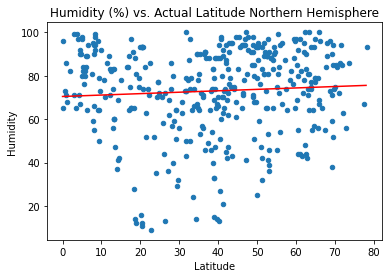

In [77]:
n_humidity_lat_axes = makeLinRegression(northern_hemisphere, "Lat", "Humidity")
n_humidity_lat_axes.get_figure().savefig("../output_data/Humidity_vs_Latitude_N_Hemisphere.png")
plt.title('Humidity (%) vs. Actual Latitude Northern Hemisphere')
plt.xlabel('Latitude')

In [60]:
print('This code creates a scatter plot of the Humidity of cities in the northern hemisphere in relation to their geographical latitude. The plot is used to attempt to visualize if there is a correlation. The flat line here denotes a correlation of 0 so no observable relationship here to speak about.')

This code creates a scatter plot of the Humidity of cities in the northern hemisphere in relation to their geographical latitude. The plot is used to attempt to visualize if there is a correlation. The flat line here denotes a correlation of 0 so no observable relationship here to speak about.


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=0.38x+75.61
The r-squared correlation coefficient for this line is 0.26


Text(0.5, 15.0, 'Latitude')

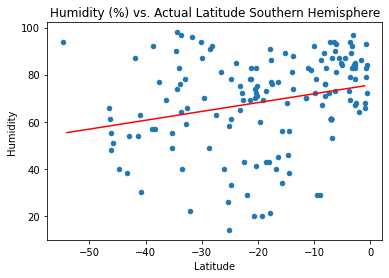

In [78]:
s_humidity_lat_axes = makeLinRegression(southern_hemisphere, "Lat", "Humidity")
s_humidity_lat_axes.get_figure().savefig("../output_data/Humidity_vs_Latitude_S_Hemisphere.png")
plt.title("Humidity (%) vs. Actual Latitude Southern Hemisphere")
plt.xlabel('Latitude')

In [62]:
print('This code creates a scatter plot of the Humidity of cities in the southern hemisphere in relation to their geographical latitude. The plot is used to attempt to visualize if there is a correlation. The graph shows a very weak positive correlation. The increase in latitude seems to play a small factor but there is likely more at play that determines your humidity level. The scatter plot clearly shows many outliers.')

This code creates a scatter plot of the Humidity of cities in the southern hemisphere in relation to their geographical latitude. The plot is used to attempt to visualize if there is a correlation. The graph shows a very weak positive correlation. The increase in latitude seems to play a small factor but there is likely more at play that determines your humidity level. The scatter plot clearly shows many outliers.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=0.17x+48.92
The r-squared correlation coefficient for this line is 0.08


Text(0.5, 15.0, 'Latitude')

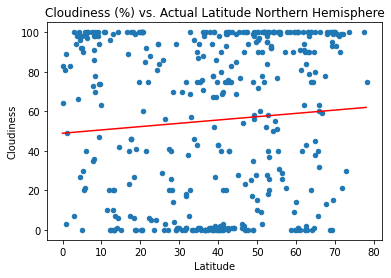

In [79]:
n_cloudiness_lat_axes = makeLinRegression(northern_hemisphere, "Lat", "Cloudiness")
n_cloudiness_lat_axes.get_figure().savefig("../output_data/Cloudiness_vs_Latitude_N_Hemisphere.png")
plt.title("Cloudiness (%) vs. Actual Latitude Northern Hemisphere")
plt.xlabel('Latitude')

In [18]:
print('This code creates a scatter plot of the Cloudiness of cities in the northern hemisphere in relation to their geographical latitude. The plot is used to attempt to visualize if there is a correlation. Correlation of 0. No relation whatsoever.')

This code creates a scatter plot of the Cloudiness of cities in the northern hemisphere in relation to their geographical latitude. The plot is used to attempt to visualize if there is a correlation. Correlation of 0. No relation whatsoever.


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=0.24x+52.99
The r-squared correlation coefficient for this line is 0.09


Text(0.5, 15.0, 'Latitude')

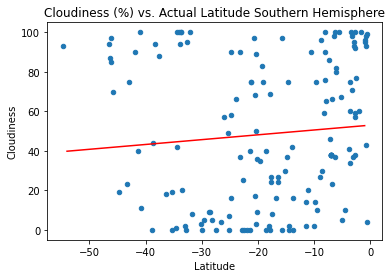

In [80]:
s_cloudiness_lat_axes = makeLinRegression(southern_hemisphere, "Lat", "Cloudiness")
s_cloudiness_lat_axes.get_figure().savefig("../output_data/Cloudiness_vs_Latitude_S_Hemisphere.png")
plt.title("Cloudiness (%) vs. Actual Latitude Southern Hemisphere")
plt.xlabel('Latitude')

In [20]:
print('This code creates a scatter plot of the Cloudiness of cities in the southern hemisphere in relation to their geographical latitude. The plot is used to attempt to visualize if there is a correlation. The graph shows a weak positive correlation. The increase in latitude seems to play a small factor but there is likely more at play that determines your cloudiness level. The scatter plot clearly shows many outliers.')

This code creates a scatter plot of the Cloudiness of cities in the southern hemisphere in relation to their geographical latitude. The plot is used to attempt to visualize if there is a correlation. The graph shows a weak positive correlation. The increase in latitude seems to play a small factor but there is likely more at play that determines your cloudiness level. The scatter plot clearly shows many outliers.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=0.04x+5.43
The r-squared correlation coefficient for this line is 0.17


Text(0.5, 15.0, 'Latitude')

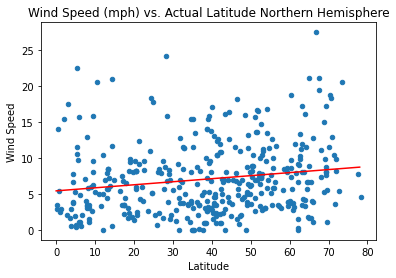

In [81]:
n_wind_lat_axes = makeLinRegression(northern_hemisphere, "Lat", "Wind Speed")
n_wind_lat_axes.get_figure().savefig("../output_data/Wind_Speed_vs_Latitude_N_Hemisphere.png")
plt.title("Wind Speed (mph) vs. Actual Latitude Northern Hemisphere")
plt.xlabel('Latitude')

In [22]:
print('This code creates a scatter plot of the wind speed in mph of cities in the northern hemisphere in relation to their geographical latitude. The plot is used to attempt to visualize if there is a correlation. The plot shows a very weak positive correlation. The plot has many outliers so relationship is very minimal.')

This code creates a scatter plot of the wind speed in mph of cities in the northern hemisphere in relation to their geographical latitude. The plot is used to attempt to visualize if there is a correlation. The plot shows a very weak positive correlation. The plot has many outliers so relationship is very minimal.


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The equation of the best-fit linear regression line for this chart is y=-0.01x+7.14
The r-squared correlation coefficient for this line is -0.04


Text(0.5, 15.0, 'Latitude')

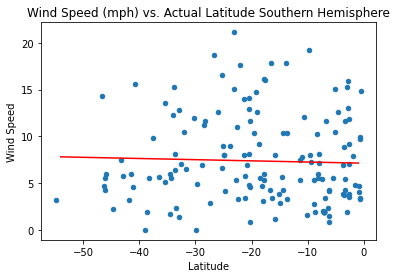

In [82]:
s_wind_lat_axes = makeLinRegression(southern_hemisphere, "Lat", "Wind Speed")
s_wind_lat_axes.get_figure().savefig("../output_data/Wind_Speed_vs_Latitude_S_Hemisphere.png")
plt.title("Wind Speed (mph) vs. Actual Latitude Southern Hemisphere")
plt.xlabel('Latitude')

In [23]:
print('This code creates a scatter plot of the wind speed in mph of cities in the southern hemisphere in relation to their geographical latitude. The plot is used to attempt to visualize if there is a correlation. The relationship here is almost 0. No correlation whatsoever.')

This code creates a scatter plot of the wind speed in mph of cities in the southern hemisphere in relation to their geographical latitude. The plot is used to attempt to visualize if there is a correlation. The relationship here is almost 0. No correlation whatsoever.


In [ ]:
### Code courtesy of 'mileslucey' from github.com, 'gendo90' from github.com, 'theodoremoreland' from github.com ###

In [ ]:
########## Written Analysis ##############

In [26]:
### Trend 1 ###
print('The data shows a very strong trend that if your city is closer to the equator (latitude 0) that your temperature will generally increase. Equally as you get further away from the equator your temperature will generally decrease. The further plots seperating the norther and southern hemisphere validate thhe accuracy of the data.')

The data shows a very strong trend that if your city is closer to the equator (latitude 0) that your temperature will generally increase. Equally as you get further away from the equator your temperature will generally decrease. The further plots seperating the norther and southern hemisphere validate thhe accuracy of the data.


In [83]:
### Trend 2 ###
print("In the Humidity comparison, the division of northern and southern hemisphere gave somewhat different results of correlation. In humidity the north is 0.06 and the south has a 0.26 positive correlation. Is there a weak correlation there because the south has a smaller smaple size? Does having a larger sample normalize the data which indicates that there shouldnt be as strong of a correlation in the southern hemisphere? When looking at the non globally divided data near the top, the original scatter plot of all cities humidity vs latitude shows that the latitude determines very little in the amount of humidity a city experiences. You can see the majority of the cities experience varying levels of humidty above 70% regardless of where they lie in latitude . In my opinion i think it is safe to say there is no relationship, trend or correlation in these categories even though the numbers in some visualisations may indicate otherwise.")

In the Humidity comparison, the division of northern and southern hemisphere gave somewhat different results of correlation. In humidity the north is 0.06 and the south has a 0.26 positive correlation. Is there a weak correlation there because the south has a smaller smaple size? Does having a larger sample normalize the data which indicates that there shouldnt be as strong of a correlation in the southern hemisphere? When looking at the non globally divided data near the top, the original scatter plot of all cities humidity vs latitude shows that the latitude determines very little in the amount of humidity a city experiences. You can see the majority of the cities experience varying levels of humidty above 70% regardless of where they lie in latitude . In my opinion i think it is safe to say there is no relationship, trend or correlation in these categories even though the numbers in some visualisations may indicate otherwise.


In [84]:
### Trend 3 ###
print("When comparing wind speeds and cloudiness to the latitude position of cities it's evident that there is little corrleation. The scatter plots show that the majority of cities lie below a wind speed of 15 mph and that cloudiness is all over the scatter plot. The outliers that have very high speeds as well are scatter across the latitudes so you really can't draw any correlations between the two variables. The scatter plot for cloudiness doesnt allow me to draw any conclisions as its so random.")

When comparing wind speeds and cloudiness to the latitude position of cities it's evident that there is little corrleation. The scatter plots show that the majority of cities lie below a wind speed of 15 mph and that cloudiness is all over the scatter plot. The outliers that have very high speeds as well are scatter across the latitudes so you really can't draw any correlations between the two variables. The scatter plot for cloudiness doesnt allow me to draw any conclisions as its so random.
